In [1]:
import pickle

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import NullFormatter
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA

In [2]:
import umap

In [3]:
### Load SoftMax

model_name = "resnet"
train_name = "IN"
test_name = "IN"


classes = ['airplane', 'bear', 'bicycle', 'bird', 
          'boat', 'bottle', 'car', 'cat', 
          'chair', 'clock', 'dog', 'elephant',
          'keyboard', 'knife', 'oven', 'truck']


load_path = f'./softmax_dict/{test_name}_to_{model_name}-{train_name}_softmax_dict.pkl'
with open(load_path, mode='rb') as f:
    dicts = pickle.load(f)


X = np.empty((0, 1000))
y = np.empty((0, ))

for i, c in enumerate(classes):
  X = np.append(X, dicts[c], axis=0).astype(float)
  y = np.append(y, [i]*dicts[c].shape[0], axis=0).astype(int)

# test labels
y = y[:400]

[0 1 2 3 4]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


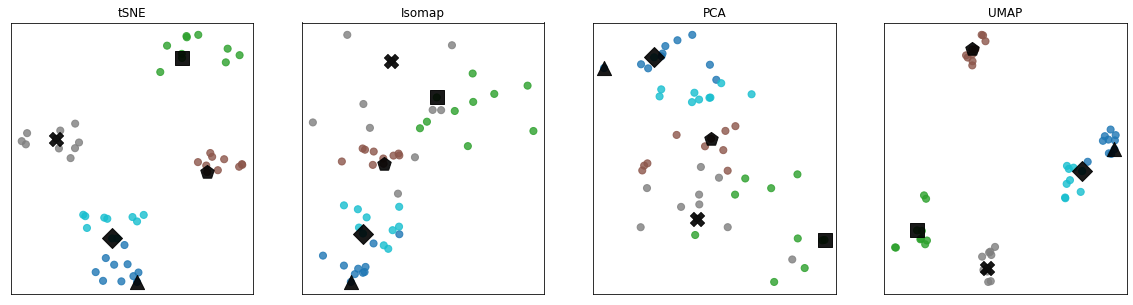

In [4]:
markers = ["^", "s", "p", "X", "D"]

### Visualizing 2D

matplotlib.pyplot.rcParams['figure.figsize'] = (20.0, 5.0)
fig = plt.figure()

save_path = './vis2d_sample.png'

m_size = 200
moreplot = 10


# test data param
test_index = np.array([1,81,161,241,321])
print(y[test_index])



# tSNE ###
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
X_embedded = tsne.fit_transform(X)
X_embedded = X_embedded[:400]

ax = fig.add_subplot(1,4,1)
for train_num in range(5):
  ax.scatter(X_embedded[train_num*80:train_num*80+moreplot, 0], X_embedded[train_num*80:train_num*80+moreplot, 1],
              c=y[train_num*80:train_num*80+moreplot], cmap='tab10',
              vmin=0, vmax=4,
              s=50, alpha=0.8)

m_counter = 0
for x1, x2 in zip(X_embedded[test_index][:, 0], X_embedded[test_index][:, 1]):
  ax.scatter(x1, x2,
              c="black",
              s=m_size, alpha=0.9,
              marker=markers[m_counter])
  m_counter += 1

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_title(f'tSNE')



# Isomap ###
isomap = Isomap(n_neighbors=10, n_components=2)
X_embedded = isomap.fit_transform(X)
X_embedded = X_embedded[:400]

ax = fig.add_subplot(1,4,2)
for train_num in range(5):
  ax.scatter(X_embedded[train_num*80:train_num*80+moreplot, 0], X_embedded[train_num*80:train_num*80+moreplot, 1],
              c=y[train_num*80:train_num*80+moreplot], cmap='tab10',
              vmin=0, vmax=4,
              s=50, alpha=0.8)

m_counter = 0
for x1, x2 in zip(X_embedded[test_index][:, 0], X_embedded[test_index][:, 1]):
  ax.scatter(x1, x2,
              c="black",
              s=m_size, alpha=0.9,
              marker=markers[m_counter])
  m_counter += 1

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_title(f'Isomap')



# PCA ###
pca = PCA(n_components=2, )
X_embedded = pca.fit_transform(X)
X_embedded = X_embedded[:400]

ax = fig.add_subplot(1,4,3)
for train_num in range(5):
  ax.scatter(X_embedded[train_num*80:train_num*80+moreplot, 0], X_embedded[train_num*80:train_num*80+moreplot, 1],
              c=y[train_num*80:train_num*80+moreplot], cmap='tab10',
              vmin=0, vmax=4,
              s=50, alpha=0.8)

m_counter = 0
for x1, x2 in zip(X_embedded[test_index][:, 0], X_embedded[test_index][:, 1]):
  ax.scatter(x1, x2,
              c="black",
              s=m_size, alpha=0.9,
              marker=markers[m_counter])
  m_counter += 1

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_title(f'PCA')



# UMAP ###
X_embedded = umap.UMAP().fit_transform(X)
X_embedded = X_embedded[:400]

ax = fig.add_subplot(1,4,4)
for train_num in range(5):
  ax.scatter(X_embedded[train_num*80:train_num*80+moreplot, 0], X_embedded[train_num*80:train_num*80+moreplot, 1],
              c=y[train_num*80:train_num*80+moreplot], cmap='tab10',
              vmin=0, vmax=4,
              s=50, alpha=0.8)

m_counter = 0
for x1, x2 in zip(X_embedded[test_index][:, 0], X_embedded[test_index][:, 1]):
  ax.scatter(x1, x2,
              c="black",
              s=m_size, alpha=0.9,
              marker=markers[m_counter])
  m_counter += 1

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_title(f'UMAP')


# Show and Save Fig
fig.patch.set_alpha(0)
fig.savefig(save_path)